## Franklin Thomas
## frathom

## P1

In [1]:
from scipy.io.wavfile import read
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
l=[]
l1=[]
k=np.empty([20,])
for i in range(1,21,1):
    l.append(read("x_ica_{0}.wav".format(i)))
for i in range(20):
    l1.append(l[i][1])
l1=np.asarray(l1)
l1.shape
print(l1)


[[   32 -1133 -1430 ...  1205  1154   970]
 [   42  -965  -284 ...  -616  -428  -558]
 [  115 -1778  1837 ...  -397  -201  -510]
 ...
 [   14  -727 -1292 ...   601   717   685]
 [   35  -822  -265 ...  -515  -275  -336]
 [   68 -1038  1162 ... -1673 -1297 -1411]]


In [2]:
from numpy import linalg as LA
w, v = LA.eigh(np.cov(l1))
w

array([8.12978712e-02, 8.15377547e-02, 8.19503599e-02, 8.21861666e-02,
       8.25354149e-02, 8.27879499e-02, 8.29913538e-02, 8.31610780e-02,
       8.33637833e-02, 8.37802869e-02, 8.40818750e-02, 8.42190729e-02,
       8.43607344e-02, 8.44627190e-02, 8.49590452e-02, 8.51857250e-02,
       6.12205645e+06, 1.41255271e+07, 3.23590749e+07, 2.04487004e+08])

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4,whiten=True)
p=pca.fit_transform(l1.T)
pca.explained_variance_ratio_
Z=p.T
Z.shape

(4, 76800)

In [4]:
Z

array([[ 0.01941137, -0.34251486,  0.03263896, ..., -0.18356779,
        -0.12374324, -0.17396422],
       [ 0.01846066, -0.08143437,  0.81002163, ..., -0.82349781,
        -0.72528122, -0.74514756],
       [-0.03503913,  0.44897217, -0.64451152, ..., -0.07041875,
        -0.03311776,  0.09070972],
       [-0.00679999,  0.13072206,  0.02000849, ...,  0.42964509,
         0.52586886,  0.64280756]])

In [5]:

W=np.random.rand(4,4)
np.random.seed(1)
W.shape

(4, 4)

In [6]:
lr=1e-7
o=1e9
Y=W@Z
err=[]
for i in range(10000):
    dw=(76800*np.identity(4)-np.tanh(Y)@(Y**3).T)@W
    W_old=W
    W=W+lr*dw
    W_new=W
    Y=W@Z
    er=np.linalg.norm(W_old)-np.linalg.norm(W_new)
    err.append(er)
    o=Y
    k=i
    if(np.allclose(W_old,W_new,rtol=1e-04, atol=1e-04)):
        break
    
    
    
   
    
    
Y

array([[-0.00345998,  0.2036434 ,  0.44030328, ..., -0.4171362 ,
        -0.35061775, -0.29690889],
       [-0.00094776,  0.01290928, -0.01578172, ...,  0.3160494 ,
         0.39884496,  0.4744534 ],
       [-0.03671945,  0.4396337 , -0.75574108, ...,  0.38274775,
         0.35673322,  0.47027019],
       [ 0.00151061, -0.03205838, -0.03593107, ..., -0.47434826,
        -0.40858239, -0.40565874]])

In [7]:
#err

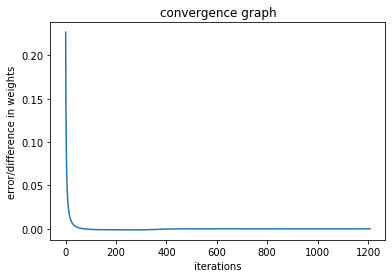

In [8]:
plt.plot([i for i in range(k+1)],err)#the iterations stop at 2504 as it converges after these many iterations
plt.title("convergence graph")
plt.xlabel("iterations")
plt.ylabel("error/difference in weights")
plt.show()

In [9]:
Y

array([[-0.00345998,  0.2036434 ,  0.44030328, ..., -0.4171362 ,
        -0.35061775, -0.29690889],
       [-0.00094776,  0.01290928, -0.01578172, ...,  0.3160494 ,
         0.39884496,  0.4744534 ],
       [-0.03671945,  0.4396337 , -0.75574108, ...,  0.38274775,
         0.35673322,  0.47027019],
       [ 0.00151061, -0.03205838, -0.03593107, ..., -0.47434826,
        -0.40858239, -0.40565874]])

In [10]:
for y in Y:
    ipd.display(ipd.Audio(y,rate=16000))

For this part ICA was implemented using the formula:
\begin{aligned}
\Delta \boldsymbol{W} & \leftarrow\left(N \boldsymbol{I}-g(\boldsymbol{Y}) f(\boldsymbol{Y})^{\top}\right) \boldsymbol{W} \\
\boldsymbol{W} & \leftarrow \boldsymbol{W}+\rho \Delta \boldsymbol{W} \\
\boldsymbol{Y} & \leftarrow \boldsymbol{W} \boldsymbol{Z}
\end{aligned}

where the learning rate chosen was 1e-7 and the W was intialized with random values.I chose k=4 in the PCA part as only 4 eigen values were high. 

## P2

In [11]:
import librosa,scipy
ocean,r = librosa.core.load('ocean.wav',sr=16000)
piano,r= librosa.load('piano.wav',sr=16000)
#ipd.Audio(oc, rate=r)

In [12]:
ipd.display(ipd.Audio(ocean,rate=16000))

In [13]:
ipd.display(ipd.Audio(piano,rate=16000))

In [14]:
S=librosa.core.stft(piano,n_fft=1024,hop_length=512,window='hann')
S.shape

(513, 157)

In [15]:
N=librosa.stft(ocean,n_fft=1024,hop_length=512,window='hann')
N.shape

(513, 157)

In [16]:
X=S+N
X.shape

(513, 157)

In [17]:
X

array([[ 2.4796402e+00+0.0000000e+00j, -2.7586892e-01+0.0000000e+00j,
        -2.4748632e-01+0.0000000e+00j, ...,
        -1.1128480e-01+0.0000000e+00j, -7.1384504e-02+0.0000000e+00j,
        -1.0244542e+00+0.0000000e+00j],
       [-2.5534725e+00+2.7755576e-16j, -2.3464248e-02+7.7353966e-01j,
        -2.0824194e-01-3.4451520e-01j, ...,
         2.8291020e-01+9.3047850e-02j,  4.3232241e-01-1.6477022e-01j,
         8.0756158e-01-9.5193714e-01j],
       [ 8.8105673e-01+1.3877788e-16j,  6.3804376e-01-2.1409087e+00j,
         1.4541254e+00+1.0430521e+00j, ...,
        -4.6022832e-01+2.2497474e-01j, -7.6389337e-01+3.5750276e-01j,
        -3.0537257e-01+1.0053883e+00j],
       ...,
       [ 7.6372370e-02-2.7755576e-17j, -8.2940683e-02-8.7257609e-02j,
         1.3662851e-02+3.6600396e-02j, ...,
        -1.6818590e-03+7.6094277e-02j,  1.2824509e-02+6.3386545e-02j,
         9.4554283e-02-3.0382100e-01j],
       [-6.7310572e-02+3.3306691e-16j,  3.2634050e-02+5.5934764e-03j,
        -6.3161547e-03

In [18]:
M=S/S+N
M

array([[ 3.2003067 +0.0000000e+00j,  0.9593135 +0.0000000e+00j,
         0.71428776+0.0000000e+00j, ...,  0.88992935+0.0000000e+00j,
         0.9287502 +0.0000000e+00j, -0.02387905+0.0000000e+00j],
       [-0.9793738 -1.1102230e-16j,  1.2062682 +2.8660718e-01j,
         1.3374829 -4.7588697e-01j, ...,  1.2859305 +9.2824049e-02j,
         1.4337707 -1.6583404e-01j,  1.8076816 -9.5295590e-01j],
       [ 1.616667  -5.5511151e-17j,  1.0078102 -5.6525624e-01j,
         1.0661693 +9.6947747e-01j, ...,  0.53246176+2.1926296e-01j,
         0.23372304+3.6023590e-01j,  0.6931273 +1.0050479e+00j],
       ...,
       [ 1.0929327 -1.1102230e-16j,  0.91363907-8.8392496e-02j,
         1.0112092 +2.9666705e-02j, ...,  0.99811476+7.6369241e-02j,
         1.0131023 +6.3236549e-02j,  1.0946023 -3.0354014e-01j],
       [ 0.9374639 -1.1102785e-16j,  1.0314864 +5.9265918e-03j,
         0.9951478 +3.1904589e-02j, ...,  0.96345013+2.9991802e-03j,
         0.9902904 -7.8506256e-03j,  1.0654634 +1.1840976e-01j]

In [19]:
S_new=np.multiply(M,X)
S_new

array([[ 7.9356093e+00+0.00000000e+00j, -2.6464477e-01+0.00000000e+00j,
        -1.7677645e-01+0.00000000e+00j, ...,
        -9.9035613e-02+0.00000000e+00j, -6.6298373e-02+0.00000000e+00j,
         2.4462996e-02-0.00000000e+00j],
       [ 2.5008042e+00+1.16615526e-17j, -2.5000620e-01+9.26371276e-01j,
        -4.4247034e-01-3.61683577e-01j, ...,
         3.5516578e-01+1.45913944e-01j,  5.9252667e-01-3.07936460e-01j,
         5.5266005e-01-2.49036980e+00j],
       [ 1.4243754e+00+1.75449137e-16j, -5.6713504e-01-2.51828790e+00j,
         5.3912830e-01+2.52181196e+00j, ...,
        -2.9438263e-01+1.88794211e-02j, -3.0732483e-01-1.91625178e-01j,
        -1.2221254e+00+3.89947981e-01j],
       ...,
       [ 8.3469860e-02-3.88140143e-17j, -8.3490767e-02-7.23906234e-02j,
         1.2730189e-02+3.74159887e-02j, ...,
        -7.4899509e-03+7.58223832e-02j,  8.9841932e-03+6.50280342e-02j,
         1.1277467e-02-3.61264169e-01j],
       [-6.3101232e-02+3.19711554e-16j,  3.3628426e-02+5.96300326e-0

In [20]:
ipd.display(ipd.Audio(librosa.core.istft(S_new, hop_length=512),rate=16000))

In [21]:
M_star=np.abs(S)**2/(np.abs(S)**2+np.abs(N)**2)#ideal mask

In [22]:
M_star

array([[1.58612095e-02, 9.70940828e-01, 1.75854582e-02, ...,
        1.21663070e-04, 3.57572640e-06, 3.15590711e-07],
       [7.75959268e-02, 6.99230313e-01, 4.80708301e-01, ...,
        1.01485755e-04, 1.49732268e-05, 6.74340470e-07],
       [1.55275419e-01, 9.00115490e-01, 6.71685696e-01, ...,
        3.22616950e-04, 1.83433676e-05, 2.14286138e-06],
       ...,
       [3.07771657e-02, 8.49623000e-04, 5.10411784e-02, ...,
        2.00377872e-05, 2.38931752e-05, 8.03228545e-07],
       [5.79519570e-03, 1.38913433e-03, 4.48394334e-03, ...,
        9.61526075e-06, 3.06367263e-04, 2.48165215e-05],
       [2.15746723e-02, 1.38295770e-01, 1.17862452e-04, ...,
        2.71782028e-07, 4.43747122e-04, 9.40327154e-05]], dtype=float32)

In [23]:
S_n=np.multiply(M_star,X)

In [24]:
S_nt=librosa.core.istft(S_n, hop_length=512)
ipd.display(ipd.Audio(librosa.core.istft(S_n, hop_length=512),rate=16000))

In [25]:
S_nt
print(len(S_nt))

79872


In [26]:

Sn=piano.flatten()
Sn=piano[:len(S_nt)]
A=np.sum(Sn**2)
B=np.sum((Sn-S_nt)**2)
SNR=10*np.log10(A/B)
print("The SNR for ideal mask is:",SNR)
#S=S.flatten()
#S=S[:len(S_nt)]
#B=np.sum((S.flatten()-S_nt)**2)
#10*np.log10(sum([S[i]**2 for i in range(len(S))]) /sum([(S[i] - S_nt[j])**2 for i in range(len(S_nt)) for j in range(len(S_nt))]))

The SNR for ideal mask is: 8.118114471435547


In [27]:
B=(S>N).astype(int)
B

array([[0, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 1, 1]])

In [28]:
S_BM=np.multiply(B,X)

In [29]:
S_BM

array([[ 0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
        -2.47486323e-01+0.00000000e+00j, ...,
        -1.11284800e-01+0.00000000e+00j, -7.13845044e-02+0.00000000e+00j,
        -1.02445424e+00+0.00000000e+00j],
       [-2.55347252e+00+2.77555756e-16j, -0.00000000e+00+0.00000000e+00j,
         0.00000000e+00-0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  6.38043761e-01-2.14090872e+00j,
         1.45412540e+00+1.04305208e+00j, ...,
        -4.60228324e-01+2.24974737e-01j, -7.63893366e-01+3.57502759e-01j,
        -3.05372566e-01+1.00538826e+00j],
       ...,
       [ 0.00000000e+00+0.00000000e+00j, -8.29406828e-02-8.72576088e-02j,
         0.00000000e+00+0.00000000e+00j, ...,
        -1.68185902e-03+7.60942772e-02j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-6.73105717e-02+3.33066907e-16j,  0.

In [30]:
ipd.display(ipd.Audio(librosa.core.istft(S_BM, hop_length=512),rate=16000))

In [31]:
S_BMt=librosa.core.istft(S_BM, hop_length=512)


In [32]:
S_BMt

array([0.0310967 , 0.04742885, 0.04689652, ..., 0.02841756, 0.02551599,
       0.03331074], dtype=float32)

In [33]:
Sb=piano.flatten()
Sb=piano[:len(S_BMt)]
A=np.sum(Sb**2)
B=np.sum((Sb-S_BMt)**2)
SNR=10*np.log10(A/B)
print("SNR for IBM is:",SNR)

SNR for IBM is: 1.6108253598213196


While the ideal masks gave a clear piano sound with a high SNR value the Ideal binary mask(IBM) gave a signal which had noise(ocean sound too was present) and a lower SNR was also obtained.

Ideal Mask:
\begin{equation}\overline{\boldsymbol{M}}=\frac{|\boldsymbol{S}|^{2}}{|\boldsymbol{S}|^{2}+|\boldsymbol{N}|^{2}}\end{equation}


IBM:
\begin{equation}B_{f t}=\left\{\begin{array}{ll}
1 & \text { if } S_{f t}>N_{f t} \\
0 & \text { otherwise }
\end{array}\right.\end{equation}


The formula for SNR:

\begin{equation}S N R=10 \log _{10}\left(\frac{\sum_{t}\{s(t)\}^{2}}{\sum_{t}\{s(t)-\hat{s}(t)\}^{2}}\right)\end{equation}

## P3

In [34]:
trs,r=librosa.core.load('trs.wav',16000)

In [35]:
S=librosa.core.stft(trs,n_fft=1024,hop_length=512)

In [36]:
ipd.display(ipd.Audio(trs,rate=16000))

In [37]:
S.shape

(513, 989)

In [38]:
np.random.seed(1)
Ws=np.ones((513,30))
Hs=np.ones((30,989))

np.random.seed(1)

In [39]:
iterations=10000
li=1e-7
odi=1e10
t=1e-5

In [40]:
for i in range(iterations):
    Hs=Hs * (np.dot(Ws.T,abs(S)) +li)/(Ws.T.dot(Ws).dot(Hs) + li)
    Ws=Ws*(np.dot(abs(S),Hs.T) +li)/(Ws.dot(Hs).dot(Hs.T) +li)
    di=0.5* np.trace((abs(S)-Ws.dot(Hs)).T.dot(abs(S)-Ws.dot(Hs)))
    if(odi-di<t):
        print(odi-di)
        break
    
    odi=di

9.942916221916676e-06


In [41]:
print(Ws,Hs)

[[0.04591584 0.04591584 0.04591584 ... 0.04591584 0.04591584 0.04591584]
 [0.0420388  0.0420388  0.0420388  ... 0.0420388  0.0420388  0.0420388 ]
 [0.03238461 0.03238461 0.03238461 ... 0.03238461 0.03238461 0.03238461]
 ...
 [0.13610421 0.13610421 0.13610421 ... 0.13610421 0.13610421 0.13610421]
 [0.12563986 0.12563986 0.12563986 ... 0.12563986 0.12563986 0.12563986]
 [0.11811304 0.11811304 0.11811304 ... 0.11811304 0.11811304 0.11811304]] [[2.12160939e-05 2.66681887e-05 2.79333549e-05 ... 1.50746288e-04
  9.78275885e-05 9.88058144e-05]
 [2.12160939e-05 2.66681887e-05 2.79333549e-05 ... 1.50746288e-04
  9.78275885e-05 9.88058144e-05]
 [2.12160939e-05 2.66681887e-05 2.79333549e-05 ... 1.50746288e-04
  9.78275885e-05 9.88058144e-05]
 ...
 [2.12160939e-05 2.66681887e-05 2.79333549e-05 ... 1.50746288e-04
  9.78275885e-05 9.88058144e-05]
 [2.12160939e-05 2.66681887e-05 2.79333549e-05 ... 1.50746288e-04
  9.78275885e-05 9.88058144e-05]
 [2.12160939e-05 2.66681887e-05 2.79333549e-05 ... 1.507

In [42]:
trn,r=librosa.core.load('trn.wav',16000)

In [43]:
trn.shape

(506166,)

In [44]:
T=librosa.core.stft(trn,n_fft=1024,hop_length=512)

In [45]:
T.shape

(513, 989)

In [46]:
Wn=np.ones((513,30))

In [47]:
Hn=np.ones((30,989))

In [48]:
li=1e-7
odi=1e10
t=1e-6

In [49]:
for i in range(iterations):
    Hn=Hn * (np.dot(Wn.T,abs(T)) +li)/(Wn.T.dot(Wn).dot(Hn) + li)
    Wn=Wn*(np.dot(abs(T),Hn.T) +li)/(Wn.dot(Hn).dot(Hn.T) +li)
    di=0.5* np.trace((abs(T)-Wn.dot(Hn)).T.dot(abs(T)-Wn.dot(Hn)))
    if(odi-di<t):
        print(odi-di)
        break
    odi=di

2.9453076422214508e-08


In [50]:
print(Wn,Hn)

[[0.8314828  0.8314828  0.8314828  ... 0.8314828  0.8314828  0.8314828 ]
 [1.72491978 1.72491978 1.72491978 ... 1.72491978 1.72491978 1.72491978]
 [2.92727477 2.92727477 2.92727477 ... 2.92727477 2.92727477 2.92727477]
 ...
 [0.79905931 0.79905931 0.79905931 ... 0.79905931 0.79905931 0.79905931]
 [0.78192454 0.78192454 0.78192454 ... 0.78192454 0.78192454 0.78192454]
 [0.69861492 0.69861492 0.69861492 ... 0.69861492 0.69861492 0.69861492]] [[7.84091195e-06 7.80578987e-06 8.34194253e-06 ... 2.81660876e-02
  2.95976995e-02 3.28750031e-02]
 [7.84091195e-06 7.80578987e-06 8.34194253e-06 ... 2.81660876e-02
  2.95976995e-02 3.28750031e-02]
 [7.84091195e-06 7.80578987e-06 8.34194253e-06 ... 2.81660876e-02
  2.95976995e-02 3.28750031e-02]
 ...
 [7.84091195e-06 7.80578987e-06 8.34194253e-06 ... 2.81660876e-02
  2.95976995e-02 3.28750031e-02]
 [7.84091195e-06 7.80578987e-06 8.34194253e-06 ... 2.81660876e-02
  2.95976995e-02 3.28750031e-02]
 [7.84091195e-06 7.80578987e-06 8.34194253e-06 ... 2.816

In [51]:
xnmf,r=librosa.core.load('x_nmf.wav',16000)

In [52]:
ipd.display(ipd.Audio(xnmf,rate=16000))

In [53]:
X=librosa.core.stft(xnmf,n_fft=1024,hop_length=512)
X.shape

(513, 131)

In [54]:
Y=abs(X)

In [55]:
Y.shape

(513, 131)

In [56]:
Wy=np.concatenate((Ws,Wn),axis=1)
Wy.shape

(513, 60)

In [57]:
Hy=np.ones((60,131))

In [58]:
li=1e-7
odi=1e10
t=1e-5

In [59]:
for i in range(iterations):
    Hy=Hy * (np.dot(Wy.T,Y) +li)/(Wy.T.dot(Wy).dot(Hy) + li)
    di=0.5* np.trace((Y-Wy.dot(Hy)).T.dot(Y-Wy.dot(Hy)))
    if(odi-di<t):
        break
    odi=di

In [60]:
Hy

array([[3.57710413e-34, 4.65195536e-20, 9.89493891e-30, ...,
        1.24386809e-59, 7.18568882e-58, 9.33398140e-36],
       [3.57710413e-34, 4.65195536e-20, 9.89493891e-30, ...,
        1.24386809e-59, 7.18568882e-58, 9.33398140e-36],
       [3.57710413e-34, 4.65195536e-20, 9.89493891e-30, ...,
        1.24386809e-59, 7.18568882e-58, 9.33398140e-36],
       ...,
       [3.17206933e-02, 2.80319419e-02, 3.85581609e-02, ...,
        4.19903602e-02, 3.52216120e-02, 2.63564050e-02],
       [3.17206933e-02, 2.80319419e-02, 3.85581609e-02, ...,
        4.19903602e-02, 3.52216120e-02, 2.63564050e-02],
       [3.17206933e-02, 2.80319419e-02, 3.85581609e-02, ...,
        4.19903602e-02, 3.52216120e-02, 2.63564050e-02]])

In [61]:
phase=X/np.linalg.norm(X)

In [62]:
S_est=Ws.dot(Hy[0:30,:])
S_estp=np.multiply(S_est,phase)

In [63]:
St=librosa.core.istft(S_estp, hop_length=512)


In [64]:
ipd.display(ipd.Audio(St,rate=16000))

In [65]:
print(St)

[-1.6582973e-37  1.7438998e-29  8.9489165e-29 ...  1.7919805e-41
  6.3902657e-39  7.2820955e-39]


In [66]:
M=S_est/Wy.dot(Hy)

In [67]:
S_B=np.multiply(M,X)

In [68]:
Sttt=librosa.core.istft(S_B, hop_length=512)

In [69]:
ipd.display(ipd.Audio(Sttt,rate=16000))

After Having listened to both the audio samples the above recovered signal should have higher SNR compared to IRM result. As there is less disturbance in the generated file and there seems to be less noise.

Mask used:
\begin{equation}\tilde{M}=\frac{W_{S} H_{(1: 30, :)}}{W_{S} H_{(1: 30, :)}+W_{N} H_{(31 , 60 , :)}}=\frac{W_{S} H_{(1: 30, :)}}{\left[W_{S} W_{N}\right] H}\end{equation}

The various Ws and Hs in this problem were initialized with random values.

## P4

In [70]:
import scipy.io
eeg = scipy.io.loadmat('eeg.mat')
#eeg

In [71]:
ranks=[2,4,6,8,10,15,20]#different ranks

In [72]:
x_train=eeg['x_train'] 
x_train.shape

(768, 3, 112)

In [73]:
Tr=np.empty((255,0))

In [74]:
for i in np.arange(112):
    T1=librosa.stft(x_train[:,0,i], n_fft = 64, hop_length=48, window='blackman')
    T2=librosa.stft(x_train[:,1,i], n_fft = 64, hop_length=48, window='blackman')
    T3=librosa.stft(x_train[:,2,i], n_fft = 64, hop_length=48, window='blackman')
    T1=T1[2:7,:].reshape(1,85)
    T2=T2[2:7,:].reshape(1,85)
    T3=T3[2:7,:].reshape(1,85)
    T_i=np.concatenate((T1,T2,T3),axis=1)
    Tr=np.concatenate((Tr,T_i.T),axis=1)
    if(Tr.shape[1]==112):
        break
Tr.shape        

(255, 112)

In [75]:
Tr

array([[-0.18705301+2.86229374e-17j, -0.15800765+6.93889390e-18j,
        -1.27693081-1.11022302e-16j, ..., -0.44603229-5.55111512e-17j,
         0.39287174+0.00000000e+00j, -0.43322602-5.55111512e-17j],
       [-0.16769905-2.59186894e-01j,  0.0889667 -1.24706089e-01j,
        -0.14289826-3.93401951e-01j, ...,  0.09796612+3.77076030e-01j,
         0.28597298+1.58523172e-01j,  0.41336125+2.01544628e-01j],
       [-0.10207901+5.35322487e-01j, -0.16498095-1.48869693e-01j,
         0.35892558-1.67546049e-01j, ..., -0.26501828-2.57846504e-01j,
         0.06367294-1.82372518e-02j,  0.19769941+2.50049122e-02j],
       ...,
       [ 0.03431823+1.41867369e-01j, -0.19715536+3.11366618e-01j,
         0.1337263 -4.81889904e-01j, ..., -0.02824488+6.50425330e-02j,
        -0.12979406-4.80915815e-01j,  0.54155445-1.03305476e-02j],
       [ 0.41499385-2.70438492e-01j, -0.31009653+3.88155341e-01j,
         0.35470533-3.85713816e-01j, ..., -0.0369519 +1.28223374e-01j,
        -1.1584295 -7.53163695e-01j

In [76]:
W_r=[]
H_r=[]
for i in ranks:
    W_r.append(np.random.rand(255,i))#appending W of different ranks
    H_r.append(np.random.rand(i,112))# appending H of different ranks
    np.random.seed(1)
W_r[0].shape

(255, 2)

In [77]:
iterations=10000
li=1e-7
odi=1e10
t=1e-5

In [78]:
for j in range(len(ranks)):
    for i in range(iterations):
        H_r[j]=H_r[j] * (np.dot(W_r[j].T,abs(Tr)) +li)/(W_r[j].T.dot(W_r[j]).dot(H_r[j]) + li)
        W_r[j]=W_r[j]*(np.dot(abs(Tr),H_r[j].T) +li)/(W_r[j].dot(H_r[j]).dot(H_r[j].T) +li)
        di=0.5* np.trace((abs(Tr)-W_r[j].dot(H_r[j])).T.dot(abs(Tr)-W_r[j].dot(H_r[j])))
        if(odi-di<t):
            break
        odi=di

In [79]:
xtest=eeg['x_te']
ytest=eeg['y_te']
ytrain=eeg['y_train']

In [80]:
Te=np.empty((255,0))

In [81]:
for i in np.arange(28):
    T1=librosa.stft(xtest[:,0,i], n_fft = 64, hop_length=48, window='blackman')
    T2=librosa.stft(xtest[:,1,i], n_fft = 64, hop_length=48, window='blackman')
    T3=librosa.stft(xtest[:,2,i], n_fft = 64, hop_length=48, window='blackman')
    T1=T1[2:7,:].reshape(1,85)
    T2=T2[2:7,:].reshape(1,85)
    T3=T3[2:7,:].reshape(1,85)
    T_i=np.concatenate((T1,T2,T3),axis=1)
    Te=np.concatenate((Te,T_i.T),axis=1)
    if(Te.shape[1]==28):
        break
Te.shape

(255, 28)

In [82]:
W_t=[]
H_t=[]
for i in ranks:
    W_t.append(np.random.rand(255,i))
    H_t.append(np.random.rand(i,28))
    np.random.seed(1)
W_t[0].shape

(255, 2)

In [83]:
int(ytrain[2])

2

In [84]:
iterations=10000
li=1e-7
odi=1e10
t=1e-5

In [85]:
for j in range(len(ranks)):
    for i in range(iterations):
        H_t[j]=H_t[j] * (np.dot(W_t[j].T,abs(Te)) +li)/(W_t[j].T.dot(W_t[j]).dot(H_t[j]) + li)
        W_t[j]=W_t[j]*(np.dot(abs(Te),H_t[j].T) +li)/(W_t[j].dot(H_t[j]).dot(H_t[j].T) +li)
        di=0.5* np.trace((abs(Te)-W_t[j].dot(H_t[j])).T.dot(abs(Te)-W_t[j].dot(H_t[j])))
        if(odi-di<t):
            break
        odi=di

In [86]:
l=[]
for h in range(len(ranks)):
    for i in range(28):
        k=[]
        for j in range(112):
            di=np.linalg.norm(H_r[h][:,j]-H_t[h][:,i])
            k.append((di,int(ytrain[j])))
        l.append(k)
len(l[0])        

112

In [87]:
for i in l:
    i.sort(key=lambda x:x[0])#soting the distances
    

In [88]:
# ranks_dict={}
# ranks_dict[2]=l[0:28]
# ranks_dict[4]=l[28:56]
# ranks_dict[6]=l[56:84]
# ranks_dict[8]=l[84:112]
# ranks_dict[10]=l[112:140]
# ranks_dict[15]=l[140:168]
# ranks_dict[20]=l[168:196] 
# ranks_dict

In [89]:
l1=[]
for i in range(len(l)):
    l1.append(l[i][:20])#k can be changed here

In [90]:
#l1

In [91]:
# taking count of 1s and 2s
l2=[]
for i in range(len(l1)):
    count1=0
    count2=0
    for x, y in l1[i]:
        if(y==1):
            count1+=1
        else:
            count2+=1
    if(count1>count2):
        l2.append(1)
    else:
        l2.append(2)
 
    

In [92]:
accuracies=[]
k=0
for i in range(28,197,28):
    ac=l2[k:i]
    k=k+28
    c=0
    for j in range(len(ac)):
        if(ac[j]==int(ytest[j])):
            c=c+1
        else:
            pass
    accuracies.append(c/len(ac)*100)
        
    

In [93]:
k=0
for i in range(28,197,28):
    print(l2[k:i])#labels that we obtained for each rank
    k=k+28


[2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2]
[2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2]
[2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2]
[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2]
[2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2]
[2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1]


In [94]:
print("The accuracies for different ranks for k=20 is",accuracies)#accuracies of each rank for k=20

The accuracies for different ranks for k=20 is [35.714285714285715, 53.57142857142857, 42.857142857142854, 42.857142857142854, 50.0, 46.42857142857143, 67.85714285714286]


The best accuracy obtained was 67.857% for rank=20 and k=20. The Ws and Hs for both train and test were initialized with random values.I have printed out the best accuracy result and as seen the highest accuracy is for rank=20 and k=20.

The values that I got for different k and ranks:

<table>
  <thead>
    <tr>
      <th>K</th>
      <th>Accuracies for different ranks(2,4,6,8,10,15,20) in %</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>4</td>
      <td>[32.143, 46.429, 50.0, 42.857, 46.429, 53.571, 64.289]</td>
    </tr>
    <tr>
      <td>5</td>
      <td>[39.286, 50.0, 53.571, 57.143, 53.571, 57.143, 46.429]</td>
    </tr>
    <tr>
      <td>10</td>
      <td>[39.289, 42.857, 50.0, 28.571, 46.429, 46.429, 46.429]</td>
    </tr>
    <tr>
      <td>15</td>
      <td>[35.714, 50.0, 46.429, 46.429, 35.714, 53.571, 57.143]</td>
    </tr>
    <tr>
      <td>20</td>
      <td>[35.714, 53.571, 42.857, 42.857, 50.0, 46.429, 67.857]</td>
    </tr>
    <tr>
      <td>25</td>
      <td>[39.286, 46.429, 42.857, 39.286, 50.0, 39.286, 60.714]</td>
    </tr>
  </tbody>
</table>